In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
!git clone https://github.com/krishnaik06/Stock-MArket-Forecasting.git


Cloning into 'Stock-MArket-Forecasting'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
data=pd.read_csv('/content/Stock-MArket-Forecasting/AAPL.csv')
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
data1=data[['close']]
data1.head()

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960


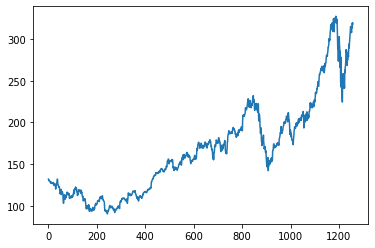

In [ ]:
plt.plot(data1)
plt.show()

In [ ]:
data1.shape

(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data_scaled=scale.fit_transform(np.array(data1))
print(data_scaled.shape)
data_scaled
print(len(data_scaled))

(1258, 1)
1258


In [ ]:
training_size=int(len(data_scaled)*0.65)
test_size=len(data_scaled)-training_size
train_data,test_data=data_scaled[0:training_size,:],data_scaled[training_size:len(data_scaled),:]

In [ ]:
train_data
print(train_data.shape)
print(test_data.shape)

(817, 1)
(441, 1)


In [ ]:
def create_dataset(input_data,time_step=1):
    data_X=[]
    data_Y=[]
    for i in range(len(input_data)-time_step-1):
        a=input_data[i:i+time_step]
        data_X.append(a)
        data_Y.append(input_data[i+time_step])
    return np.array(data_X),np.array(data_Y)


x_train,y_train=create_dataset(train_data,100)    
x_test,y_test=create_dataset(test_data,100)
print(x_train.shape)
print(x_test.shape)

(716, 100, 1)
(340, 100, 1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 8s 307ms/step - loss: 0.0260 - val_loss: 0.0673
Epoch 2/50
12/12 [==============================] - 2s 197ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 3/50
12/12 [==============================] - 2s 189ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 4/50
12/12 [==============================] - 2s 192ms/step - loss: 8.6799e-04 - val_loss: 0.0059
Epoch 5/50
12/12 [==============================] - 2s 194ms/step - loss: 6.2808e-04 - val_loss: 0.0089
Epoch 6/50
12/12 [==============================] - 2s 192ms/step - loss: 7.4359e-04 - val_loss: 0.0047
Epoch 7/50
12/12 [==============================] - 2s 191ms/step - loss: 6.4605e-04 - val_loss: 0.0047
Epoch 8/50
12/12 [==============================] - 2s 193ms/step - loss: 6.2568e-04 - val_loss: 0.0056
Epoch 9/50
12/12 [==============================] - 2s 196ms/step - loss: 6.1662e-04 - val_loss: 0.0047
Epoch 10/50
12/12 [==============================] - 2s 192ms/step - loss: 6

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
##Transformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))



### Test Data RMSE

print(math.sqrt(mean_squared_error(y_test,test_predict)))

print(len(train_predict))

144.8909078924239
242.63249282127381
716


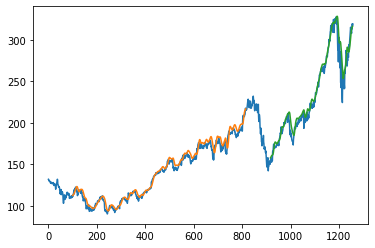

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_scaled)-1, :]=test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


